# Skin Temperature 

### Reading Skin Temperature Files from the folder 

In [17]:
import pandas as pd
import numpy as np  
import re

##using !ls command to read multiple files from multiple folder
data = !ls ./Documents/Semester2/Projects/Insomnia/newskintemp/INS_WI*/*.xlsx

master_data = pd.DataFrame()
for f in data:
##Reading the file in pandas which is in excel format 
    
    file_df = pd.read_excel(f) 

##Getting the required field of temperature(eg: Fingertip_INS_WI_008_N1 )    
    filename = file_df['Unnamed: 1'][2]

##Skipping first 24 rows to get the required reading values
    column_names = ['start_time','temp_value']
    data_df = pd.read_excel(f, names=column_names, skiprows=25)
    
##Removing Special Characters from temperature to get the consistent value through out
    data_df['temp_value']=data_df['temp_value'].replace('°C','',regex=True)  

##Assigning the filename to new Field 'Filename' and 'record_num'
    data_df['Filename'] = filename
    #data_df['Start_time'] = Reading
    master_data = master_data.append(data_df)
    
    master_data.index.name='record_id'
    master_data['subject_id']= master_data['Filename'].str.split('_',1).str[1].str.strip() 
    master_data['sensor_site']= master_data['Filename'].str.split('_',1).str[0].str.strip()
    #master_data['Start_time']= master_data['Reading']
    #.str.split('_', expand=True,n=1)
print(master_data.tail(5))
#print(master_data[master_data['start_time']=='Reading'])
#print(master_data['Filename'])

                          Filename sensor_site          start_time  \
record_id                                                            
4091       Upperleg_INS_WI_032_N1     Upperleg 2016-02-19 10:01:00   
4092       Upperleg_INS_WI_032_N1     Upperleg 2016-02-19 10:02:00   
4093       Upperleg_INS_WI_032_N1     Upperleg 2016-02-19 10:02:00   
4094       Upperleg_INS_WI_032_N1     Upperleg 2016-02-19 10:02:00   
4095       Upperleg_INS_WI_032_N1     Upperleg 2016-02-19 10:02:00   

              subject_id  temp_value  
record_id                             
4091       INS_WI_032_N1      22.935  
4092       INS_WI_032_N1      22.935  
4093       INS_WI_032_N1      22.935  
4094       INS_WI_032_N1      22.935  
4095       INS_WI_032_N1      22.935  


In [20]:
##Group multiple rows by Filename and merge readings into one value
master_data['temp_value'] = master_data['temp_value'].astype(str) #Changing the data type of the column Values(temperature recrding value) 

new_df = pd.DataFrame()
new_df = master_data.groupby(['subject_id','sensor_site'])['temp_value'].apply(','.join).reset_index()

new_df.index.name='record_id'
new_df['sampling_interval'] = 15
new_df['start_time'] = master_data['start_time'][2].tolist()
new_df['temp_value'] = '{' + new_df['temp_value'] + '}' ## concatenate with starting { and ending with } for array insert

print(new_df.head(5))

##Copying the data into csv format    
    
#master_data.to_csv('./Documents/Semester2/Projects/Insomnia/Output_Files/temp4.csv')

              subject_id sensor_site  \
record_id                              
0          INS_WI_002_N1     Abdomen   
1          INS_WI_002_N1        Calf   
2          INS_WI_002_N1       Chest   
3          INS_WI_002_N1   Fingertip   
4          INS_WI_002_N1        Foot   

                                                  temp_value  \
record_id                                                      
0          {24.266,24.203,24.266,24.266,24.203,24.266,24....   
1          {24.207,24.207,24.207,24.207,24.207,24.207,24....   
2          {24.162,24.162,24.225,24.162,24.225,24.225,24....   
3          {24.141,24.141,24.141,24.141,24.141,24.141,24....   
4          {24.207,24.207,24.207,24.207,24.207,24.207,24....   

           sampling_interval          start_time  
record_id                                         
0                         15 2015-09-16 17:59:00  
1                         15 2015-09-16 17:59:00  
2                         15 2015-09-16 17:59:00  
3              

### Inserting the skin temperature data into postgres database  

In [21]:
##inserting the data into database 
import numpy as np
import sqlalchemy
from sqlalchemy import Float
from sqlalchemy import update
from sqlalchemy import exc
#from sqlalchemy.engine.base import ResultProxy
#from sqlalchemy.sql.expression import cast
#from sqlalchemy.dialects.postgresql import *

from sqlalchemy import create_engine
engine = create_engine('postgresql://localhost:5432/SKalthur')

##Commented bcause data has been inserted into postgresql

#try:
    #new_df.to_sql('skintemperature_recording', engine, if_exists = 'append')
#except exc.IntegrityError:
#       pass



# Actigraphy

### Retrieving Actigraphy data from Database

In [142]:
##Reading Actigraphy data from Database using Select query
acti_df_interval_stat = pd.read_sql_query('select * from "actiwatch_interval_stats"',con=engine)
print(acti_df_interval_stat.head(5))

   actigraph_id intervaltype  intervalnum   startdate starttime     enddate  \
0            75        DAILY            2  2015-08-18  12:00:00  2015-08-19   
1            75        DAILY            3  2015-08-19  12:00:00  2015-08-20   
2            75        DAILY            4  2015-08-20  12:00:00  2015-08-21   
3            75        DAILY            5  2015-08-21  12:00:00  2015-08-22   
4            75        DAILY            6  2015-08-22  12:00:00  2015-08-23   

    endtime  duration  totalactivity  avgactivity      ...        \
0  12:00:00    1440.0       387794.0       269.30      ...         
1  12:00:00    1440.0       432155.0       300.11      ...         
2  12:00:00    1440.0       423224.0       293.91      ...         
3  12:00:00    1440.0       298047.0       206.98      ...         
4  12:00:00    1440.0       184953.0       128.44      ...         

  invtimeactivity invtimesleepwake percentactinv  percentinvsleepwake  \
0             0.0              0.0         

In [143]:
##Reading Actigraphy data from Database
acti_df_acti_recording = pd.read_sql_query('select * from "actiwatch_recording"',con=engine)
print(acti_df_acti_recording.head(5))

   actigraph_id  subject_id subject_age_years subject_gender actiwatch_type  \
0            75  INS_WI_001              None           None    Actiwatch 2   
1            76  INS_WI_002              None           None    Actiwatch 2   
2            77  INS_WI_003              None           None    Actiwatch 2   
3            78  INS_WI_004              None           None    Actiwatch 2   
4            79  INS_WI_005              None           None    Actiwatch 2   

     collection_start  tz_offset                 logging_mode  \
0 2015-08-17 18:44:00      36000  Activity and Photopic Light   
1 2015-09-01 23:59:00      36000  Activity and Photopic Light   
2 2015-09-09 06:36:00      36000  Activity and Photopic Light   
3 2015-08-26 18:00:00      36000  Activity and Photopic Light   
4 2015-08-26 06:15:00      36000  Activity and Photopic Light   

   epoch_length_seconds actiwatch_id when_battery_installed  \
0                    30       A13389              1/01/1902   
1       

# PSG

### Reading the PSG data from the folder

In [24]:
##Reading the PSG data from the folder
psg_df = pd.read_csv('/Users/SKalthur/Documents/Semester2/Projects/Insomnia/Files_Insomnia/StreamC_PSG300_night1_8-8-2016_v1.csv')
psg_df = psg_df.replace('%','',regex=True)
psg_df_select = psg_df.ix[:,0:26]
print(psg_df_select.tail(5))
psg_df.shape

    No.  Participant Record ID  Participant  PSG File_Name  DOB   Study Date  \
92   93                    149  INS_WI_066             NaN  NaN   13/07/2016   
93   94                    157  INS_WI_065             NaN  NaN   20/07/2016   
94   95                    158  INS_WI_052             NaN  NaN   20/07/2016   
95   96                    150  INS_WI_051             NaN  NaN   14/07/2016   
96   97                    161  INS_WI_089             NaN  NaN   10/08/2016   

   Study Start_Time Study End_Time  Time in_Bed_min  Sleep Latency_min  \
92            22:43           7:00            476.6               20.2   
93            22:33           5:30            395.3               21.7   
94            23:00           7:59            492.9               46.9   
95             1:40           7:30            345.3                5.0   
96            23:19           6:25            383.7               13.8   

         ...        REM min REM Percent  Stage 1_min  Stage 1_Percent  \
9

(97, 302)

### Inserting the psg data to postgres database

In [25]:
## Inserting the psg data to PostgresSQL database
import sqlalchemy
from sqlalchemy import create_engine 
engine = create_engine('postgresql://localhost:5432/SKalthur')
#engine.execute("SET DateStyle ='mdy'")
psg_df_select.to_sql('psg_data', engine, if_exists = 'append')

IntegrityError: (psycopg2.IntegrityError) duplicate key value violates unique constraint "psg_data_pkey"
DETAIL:  Key ("Participant")=(FL102 ) already exists.
 [SQL: 'INSERT INTO psg_data (index, "No.", "Participant Record ID", "Participant", "PSG File_Name", "DOB", "Study Date", "Study Start_Time", "Study End_Time", "Time in_Bed_min", "Sleep Latency_min", "REM Latency_min", "Sleep Efficiency_Percent", "Total Time_Awake_During_Sleep_Period_min", "Total Sleep_Time_min", "NREM min", "NREM Percent", "REM min", "REM Percent", "Stage 1_min", "Stage 1_Percent", "Stage 2_min", "Stage 2_Percent", "Stage 3_min", "Stage 3_Percent", "Stage 4_min", "Stage 4_Percent") VALUES (%(index)s, %(No.)s, %(Participant Record ID)s, %(Participant)s, %(PSG File_Name)s, %(DOB)s, %(Study Date)s, %(Study Start_Time)s, %(Study End_Time)s, %(Time in_Bed_min)s, %(Sleep Latency_min)s, %(REM Latency_min)s, %(Sleep Efficiency_Percent)s, %(Total Time_Awake_During_Sleep_Period_min)s, %(Total Sleep_Time_min)s, %(NREM min)s, %(NREM Percent)s, %(REM min)s, %(REM Percent)s, %(Stage 1_min)s, %(Stage 1_Percent)s, %(Stage 2_min)s, %(Stage 2_Percent)s, %(Stage 3_min)s, %(Stage 3_Percent)s, %(Stage 4_min)s, %(Stage 4_Percent)s)'] [parameters: ({'REM min': 44.5, 'Stage 3_min': 29.0, 'Time in_Bed_min': 416.5, 'Stage 3_Percent': '10.3', 'REM Percent': '15.8', 'NREM min': 238.0, 'Stage 1_min': 59.0, 'REM Latency_min': 109.5, 'Stage 2_Percent': '53.1', 'index': 0, 'PSG File_Name': None, 'Total Time_Awake_During_Sleep_Period_min': 83.5, 'Total Sleep_Time_min': 282.5, 'Stage 2_min': 150.0, 'Study Start_Time': '20:43:24', 'Participant Record ID': 147, 'Stage 1_Percent': '20.9', 'Sleep Efficiency_Percent': '67.8', 'Sleep Latency_min': 1.5, 'Stage 4_Percent': '0', 'Study End_Time': '7:00:53', 'NREM Percent': '84.2', 'Study Date': '31/07/2016', 'Stage 4_min': 0, 'Participant': 'FL102 ', 'No.': 1, 'DOB': '7/06/1948'}, {'REM min': 79.5, 'Stage 3_min': 94.5, 'Time in_Bed_min': 414.0, 'Stage 3_Percent': '26', 'REM Percent': '21.9', 'NREM min': 284.0, 'Stage 1_min': 28.5, 'REM Latency_min': 80.0, 'Stage 2_Percent': '44.3', 'index': 1, 'PSG File_Name': None, 'Total Time_Awake_During_Sleep_Period_min': 15.0, 'Total Sleep_Time_min': 363.5, 'Stage 2_min': 161.0, 'Study Start_Time': '22:07:26', 'Participant Record ID': 145, 'Stage 1_Percent': '7.8', 'Sleep Efficiency_Percent': '87.8', 'Sleep Latency_min': 34.0, 'Stage 4_Percent': '0', 'Study End_Time': '7:17:55', 'NREM Percent': '78.1', 'Study Date': '24/07/2016', 'Stage 4_min': 0, 'Participant': 'FL101 ', 'No.': 2, 'DOB': '20/08/1997'}, {'REM min': 18.0, 'Stage 3_min': 29.5, 'Time in_Bed_min': 359.0, 'Stage 3_Percent': '18.9', 'REM Percent': '11.5', 'NREM min': 138.0, 'Stage 1_min': 20.5, 'REM Latency_min': 209.5, 'Stage 2_Percent': '56.4', 'index': 2, 'PSG File_Name': None, 'Total Time_Awake_During_Sleep_Period_min': 156.5, 'Total Sleep_Time_min': 156.0, 'Stage 2_min': 88.0, 'Study Start_Time': '23:52:27', 'Participant Record ID': 146, 'Stage 1_Percent': '13.1', 'Sleep Efficiency_Percent': '43.5', 'Sleep Latency_min': 30.5, 'Stage 4_Percent': '0', 'Study End_Time': '6:07:26', 'NREM Percent': '88.5', 'Study Date': '24/07/2016', 'Stage 4_min': 0, 'Participant': 'FL107 ', 'No.': 3, 'DOB': '18/08/1958'}, {'REM min': 58.5, 'Stage 3_min': 29.0, 'Time in_Bed_min': 407.5, 'Stage 3_Percent': '10.7', 'REM Percent': '21.5', 'NREM min': 213.0, 'Stage 1_min': 43.0, 'REM Latency_min': 130.0, 'Stage 2_Percent': '51.9', 'index': 3, 'PSG File_Name': None, 'Total Time_Awake_During_Sleep_Period_min': 105.0, 'Total Sleep_Time_min': 271.5, 'Stage 2_min': 141.0, 'Study Start_Time': '23:24:05', 'Participant Record ID': 134, 'Stage 1_Percent': '15.8', 'Sleep Efficiency_Percent': '66.6', 'Sleep Latency_min': 20.0, 'Stage 4_Percent': '0', 'Study End_Time': '7:13:04', 'NREM Percent': '78.5', 'Study Date': '26/06/2016', 'Stage 4_min': 0, 'Participant': 'FL100 ', 'No.': 4, 'DOB': '13/07/1975'}, {'REM min': 89.0, 'Stage 3_min': 30.0, 'Time in_Bed_min': 480.5, 'Stage 3_Percent': '6.8', 'REM Percent': '20.3', 'NREM min': 349.5, 'Stage 1_min': 37.5, 'REM Latency_min': 78.0, 'Stage 2_Percent': '64.3', 'index': 4, 'PSG File_Name': None, 'Total Time_Awake_During_Sleep_Period_min': 25.0, 'Total Sleep_Time_min': 438.5, 'Stage 2_min': 282.0, 'Study Start_Time': '21:43:15', 'Participant Record ID': 133, 'Stage 1_Percent': '8.6', 'Sleep Efficiency_Percent': '91.3', 'Sleep Latency_min': 16.5, 'Stage 4_Percent': '0', 'Study End_Time': '7:19:14', 'NREM Percent': '79.7', 'Study Date': '12/06/2016', 'Stage 4_min': 0, 'Participant': 'FL098 ', 'No.': 5, 'DOB': '15/08/1972'}, {'REM min': 59.5, 'Stage 3_min': 5.0, 'Time in_Bed_min': 407.0, 'Stage 3_Percent': '1.4', 'REM Percent': '16.1', 'NREM min': 309.0, 'Stage 1_min': 28.5, 'REM Latency_min': 123.5, 'Stage 2_Percent': '74.8', 'index': 5, 'PSG File_Name': None, 'Total Time_Awake_During_Sleep_Period_min': 15.0, 'Total Sleep_Time_min': 368.5, 'Stage 2_min': 275.5, 'Study Start_Time': '22:58:26', 'Participant Record ID': 129, 'Stage 1_Percent': '7.7', 'Sleep Efficiency_Percent': '90.5', 'Sleep Latency_min': 23.5, 'Stage 4_Percent': '0', 'Study End_Time': '6:51:55', 'NREM Percent': '83.9', 'Study Date': '5/06/2016', 'Stage 4_min': 0, 'Participant': 'FL085 ', 'No.': 6, 'DOB': '16/04/1960'}, {'REM min': 42.5, 'Stage 3_min': 56.5, 'Time in_Bed_min': 452.5, 'Stage 3_Percent': '18.6', 'REM Percent': '14', 'NREM min': 261.5, 'Stage 1_min': 24.5, 'REM Latency_min': 79.5, 'Stage 2_Percent': '59.4', 'index': 6, 'PSG File_Name': None, 'Total Time_Awake_During_Sleep_Period_min': 75.5, 'Total Sleep_Time_min': 304.0, 'Stage 2_min': 180.5, 'Study Start_Time': '23:39:38', 'Participant Record ID': 128, 'Stage 1_Percent': '8.1', 'Sleep Efficiency_Percent': '67.2', 'Sleep Latency_min': 17.5, 'Stage 4_Percent': '0', 'Study End_Time': '7:12:07', 'NREM Percent': '86', 'Study Date': '1/06/2016', 'Stage 4_min': 0, 'Participant': 'FL088 ', 'No.': 7, 'DOB': '17/12/1946'}, {'REM min': 69.0, 'Stage 3_min': 95.5, 'Time in_Bed_min': 479.5, 'Stage 3_Percent': '29.3', 'REM Percent': '21.2', 'NREM min': 257.0, 'Stage 1_min': 22.5, 'REM Latency_min': 111.0, 'Stage 2_Percent': '42.6', 'index': 7, 'PSG File_Name': None, 'Total Time_Awake_During_Sleep_Period_min': 57.5, 'Total Sleep_Time_min': 326.0, 'Stage 2_min': 139.0, 'Study Start_Time': '22:56:59', 'Participant Record ID': 126, 'Stage 1_Percent': '6.9', 'Sleep Efficiency_Percent': '68', 'Sleep Latency_min': 6.5, 'Stage 4_Percent': '0', 'Study End_Time': '6:56:28', 'NREM Percent': '78.8', 'Study Date': '1/06/2016', 'Stage 4_min': 0, 'Participant': 'FL091 ', 'No.': 8, 'DOB': '27/03/1963'}  ... displaying 10 of 97 total bound parameter sets ...  {'REM min': 83.8, 'Stage 3_min': None, 'Time in_Bed_min': 345.3, 'Stage 3_Percent': '28.70', 'REM Percent': '25.80', 'NREM min': 241.5, 'Stage 1_min': 7.5, 'REM Latency_min': 53.0, 'Stage 2_Percent': '43.20', 'index': 95, 'PSG File_Name': None, 'Total Time_Awake_During_Sleep_Period_min': 20.0, 'Total Sleep_Time_min': 325.3, 'Stage 2_min': 140.5, 'Study Start_Time': ' 1:40', 'Participant Record ID': 150, 'Stage 1_Percent': '2.30', 'Sleep Efficiency_Percent': '92.90', 'Sleep Latency_min': 5.0, 'Stage 4_Percent': '0.00', 'Study End_Time': ' 7:30', 'NREM Percent': '74.20', 'Study Date': ' 14/07/2016', 'Stage 4_min': 0, 'Participant': 'INS_WI_051 ', 'No.': 96, 'DOB': None}, {'REM min': 3.0, 'Stage 3_min': None, 'Time in_Bed_min': 383.7, 'Stage 3_Percent': '36.80', 'REM Percent': '0.90', 'NREM min': 314.0, 'Stage 1_min': 7.0, 'REM Latency_min': 407.3, 'Stage 2_Percent': '60.10', 'index': 96, 'PSG File_Name': None, 'Total Time_Awake_During_Sleep_Period_min': 66.7, 'Total Sleep_Time_min': 317.0, 'Stage 2_min': 190.5, 'Study Start_Time': ' 23:19', 'Participant Record ID': 161, 'Stage 1_Percent': '2.20', 'Sleep Efficiency_Percent': '74.30', 'Sleep Latency_min': 13.8, 'Stage 4_Percent': '0.00', 'Study End_Time': ' 6:25', 'NREM Percent': '99.10', 'Study Date': ' 10/08/2016', 'Stage 4_min': 0, 'Participant': 'INS_WI_089 ', 'No.': 97, 'DOB': None})]

# Subjective_Data

### Reading the subjective data from folder

In [26]:
##Reading the subjective data from the folder

subjective_df = pd.read_csv('subjective_data.csv')
subjective_df.index.name='record_id'
subjective_df.columns = ['No_id','Participant_Record_id','Participant','Pre_post','Week','Day_number','Morning_1','Morning_2','In_lab','S1_Todays_date','S2_Time','S3_Bed_time', 'S4_Attempt_to_fall_asleep_min','S5_How_long_to_fall_asleep_min',
'S6_Wake_up_time','S7_Sleep_duration_hours_min',
'S8_Time_in_bed_before_getting_up_minutes',
'S9_How_many_times_awake','WASO_minutes','S_10_Did_anything_disturb_your_sleep',
'S_10_Noise','S_10_Work_duties',
'S_10_Thoughts_on_mind','S_10_Toilet','S_10_Light',
'S_10_Aches_pain_physical_discomfort','S_10_Air_temperature','S_10_Eletronic_media',
'S_10_Other','S_11_Rate_quality_of_sleep','S_12_How_sleepy_you_have_felt_5_min',
'S_13_Did_you_have_any_caffeine','S_13_Coffee_cups','S_13_Tea_cups',
'S_13_Caffeinated_soft_drinks','S_13_Caffeine_pills_100mg','S_14_Did_you_have_any_alcohol','S_14_Beer','S_14_Wine_150mL','S_14_Spirits_30mL','S_15_Did_exercise','S_15_ow_many_times_exercised','S_15_When_exercised','S_15_For_how_long_exercised_minutes',
'S_15_How_strenuous','S_16_Did_you_nap_yesterday','S_16_Nap_how_many_times','S_16_Nap_start','S_16_Nap_end','S_17_Did_you_take_sleep_pills','S_17_Type_of_medication',
'S_18_How_many_times_removed_actiwatch','S_18_Actiwatch_removed_at','S_18_Actiwatch_put_back_on_at']
subjective_df['S1_Todays_date'] = pd.to_datetime(subjective_df['S1_Todays_date'])
subjective_df['S6_Wake_up_time'] = subjective_df['S6_Wake_up_time'].str.replace(":","")
subjective_df['S7_Sleep_duration_hours_min'] = subjective_df['S7_Sleep_duration_hours_min'].str.replace(":","")
subjective_df.columns = map(str.lower, subjective_df.columns)
print(subjective_df)

           no_id  participant_record_id  participant  pre_post  week  \
record_id                                                              
0              1                     14  INS_WI_006        NaN   NaN   
1              2                     24  INS_WI_014        NaN   NaN   
2              3                     29  INS_WI_012        NaN   NaN   
3              4                     18  INS_WI_011        NaN   NaN   
4              5                     23  INS_WI_013        NaN   NaN   
5              6                     28  INS_WI_015        NaN   NaN   
6              7                     37  INS_WI_019        NaN   NaN   
7              8                    159  INS_WI_092        NaN   NaN   
8              9                    148  INS_WI_091        NaN   NaN   
9             10                    161  INS_WI_089        NaN   NaN   
10            11                    153  INS_WI_086        NaN   NaN   
11            12                    122  INS_WI_085        NaN  

###  Inserting the subjective data to postgres database

In [27]:
## Inserting the subjective data to PostgresSQL database
import sqlalchemy
from sqlalchemy import create_engine 
engine = create_engine('postgresql://localhost:5432/SKalthur')
#engine.execute("SET DateStyle ='mdy'")
subjective_df.to_sql('subjective_data', engine, if_exists = 'append')

# Aggregate Data (PSG, Actigraphy and Subjective data)

In [170]:
##Code for reference of column names from aggregate view in postgresql 
##SELECT ps."Participant" AS ps_participant,
##     ps."Study Date" AS ps_studydate,
##     ps."Total Sleep_Time_min" AS ps_tst_mins,
##     ps."Sleep Latency_min" AS ps_sol_mins,
##     ps."Sleep Efficiency_Percent" AS ps_se_perc,
##     ps."Total Time_Awake_During_Sleep_Period_min" AS ps_waso_mins,
##     su.s1_todays_date AS su_s1_todays_date,
##     su.s7_sleep_duration_hours_min AS su_sleep_duration_hours_min,
##     su.s5_how_long_to_fall_asleep_min AS su_s5_how_long_to_fall_asleep_min,
##     su.s3_bed_time_form AS su_s3_bed_time,
##     su.s4_attempt_to_fall_asleep_min_form AS su_s4_attempt_to_fall_asleep_min,
##     su.s6_wake_up_time_form AS su_s6_wake_up_time,
##     su.s_11_rate_quality_of_sleep AS su_s_11_rate_quality_of_sleep,
##     su.waso_minutes AS su_waso_mins,
##     ar.actigraph_id AS ar_actigraph_id,
##     ai.startdate AS ai_startdate,
##     ai.sleeptime AS ai_tst_mins,
##     ai.onsetlatency AS ai_sol_mins,
##     ai.efficiency AS ai_se_mins,
##     ai.waso AS ai_waso_mins
##     FROM psg_data ps
##     JOIN subjective_data su ON btrim(ps."Participant") = btrim(su.participant::text)
##     JOIN actiwatch_recording ar ON btrim(ps."Participant") = btrim(ar.subject_id::text)
##     JOIN actiwatch_interval_stats ai ON ar.actigraph_id = ai.actigraph_id AND to_date(ps."Study Date", 'DD-MM-YYYY'::text) = ai.startdate;

In [165]:
##Aggregate dataframe which is retrieved data from postgresql(PSG table, subjective data, actigraphy recording and actigraphy interval stats)
aggregate_df = pd.read_sql_query("select * from aggregate_view",con=engine)
aggregate_df['ps_participant'] = aggregate_df['ps_participant'] + '_N1'
aggregate_df['ps_participant']  = aggregate_df['ps_participant'].str.replace(' ', '')
aggregate_df['ps_se_perc'] = aggregate_df['ps_se_perc'].apply(pd.to_numeric, errors = 'coerce')
aggregate_df['su_sol_mins']= aggregate_df['su_sol_mins'].apply(pd.to_numeric, errors ='coerce')
aggregate_df['su_tst_mins']= aggregate_df['su_tst_mins'].apply(pd.to_numeric, errors ='coerce')
aggregate_df['su_waso_mins']= aggregate_df['su_waso_mins'].apply(pd.to_numeric, errors ='coerce')
sum_var = aggregate_df['su_sol_mins']+aggregate_df['su_tst_mins']+aggregate_df['su_waso_mins']
aggregate_df['su_se_perc'] = aggregate_df['su_tst_mins'].div(sum_var, axis = 'index')*100
print(aggregate_df.dtypes)

ps_participant                       object
ps_studydate                         object
ps_tst_mins                         float64
ps_sol_mins                         float64
ps_se_perc                          float64
ps_waso_mins                        float64
su_s1_todays_date                    object
su_tst_mins                         float64
su_sol_mins                           int64
su_s3_bed_time                       object
su_s4_attempt_to_fall_asleep_min     object
su_s6_wake_up_time                   object
su_s_11_rate_quality_of_sleep         int64
su_waso_mins                        float64
ar_actigraph_id                       int64
ai_startdate                         object
ai_tst_mins                         float64
ai_sol_mins                          object
ai_se_mins                           object
ai_waso_mins                         object
su_se_perc                          float64
dtype: object


### Plotting temperature data with Subjective Bed time and Wake up time

In [166]:
##Reading the skintemperature data from Postgres sql         
#x_df = pd.read_sql_query('select * from "skintemperature_recording"',con=engine)
#print(x_df)

temp_new_df = pd.read_sql_query("SELECT subject_id ,sensor_site, UNNEST(temp_value) as temp_val, start_time + interval '1 second' * sampling_interval * (generate_subscripts(temp_value, 1)-1) as starttime from skintemperature_recording",con=engine)
temp_plot_df = pd.merge(temp_new_df,aggregate_df, how='left',left_on='subject_id', right_on='ps_participant')

##Selects particular subject from the temp_df for producing graph in the cells below
temp_df_subset = temp_plot_df[temp_plot_df['subject_id'] == 'INS_WI_008_N1']
temp_df_subset = temp_df_subset.reset_index(drop=True)

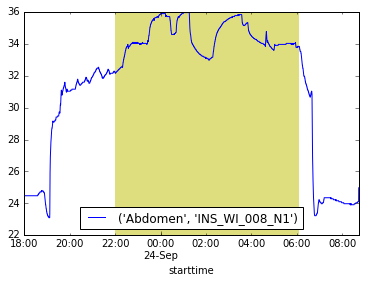

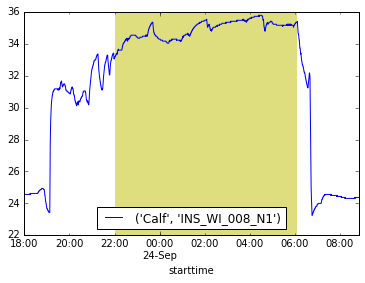

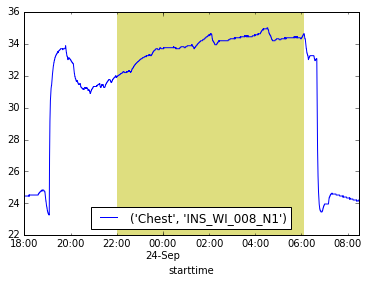

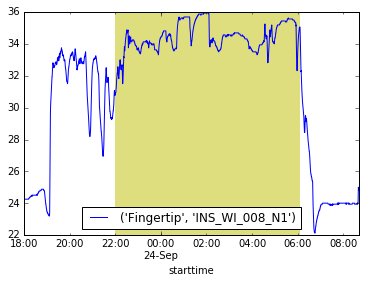

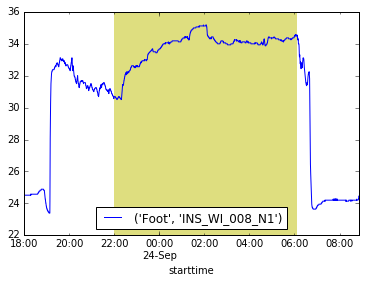

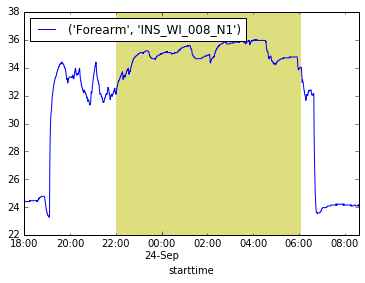

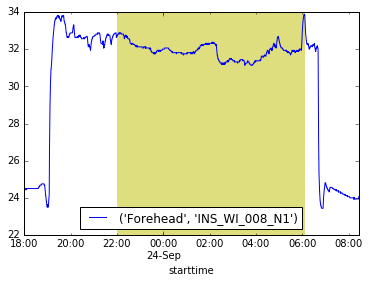

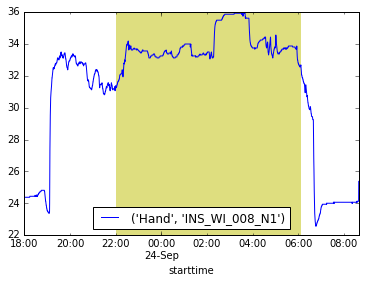

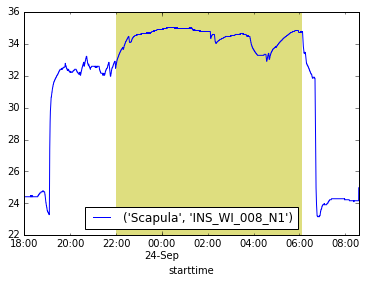

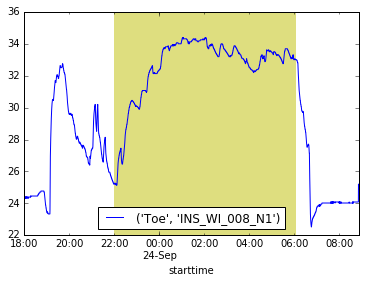

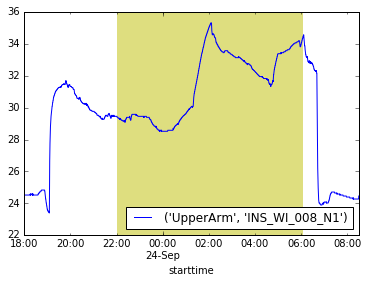

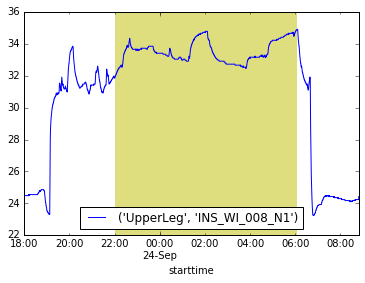

In [167]:
import matplotlib.pyplot as plt
%matplotlib inline
from ggplot import *
for i, group in temp_df_subset.groupby(['sensor_site','subject_id']):
    group.plot(x='starttime',y='temp_val', label = str(i))
    plt.axvspan(*pd.to_datetime([temp_df_subset['su_s3_bed_time'][0],temp_df_subset['su_s6_wake_up_time'][0]]), color='y', alpha=0.5, lw=0)
    plt.legend(loc = 'best')

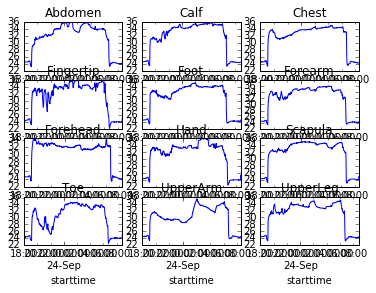

In [168]:
import matplotlib.pyplot as plt
%matplotlib inline
from ggplot import *

fig = plt.figure()
graph = 0
#group = temp_df.groupby(['sensor_site'])
#group_site.plot(x='starttime',y='temp_val')

for i, group in temp_df_subset.groupby('sensor_site'):
    graph +=1
    ax = fig.add_subplot(4,3, graph)

    #group.plot(x='starttime',y='temp_val', label = str(i))
    group.plot(x='starttime',y='temp_val', title = str(i), ax=ax,legend=None )

plt.show()

# Predictive Modeling 

### Classify Temperature data to Proximal and Distal. Calculate average temperature for both.

In [184]:
##Reading the skintemperature data from Postgres sql using Select query     

temp_df = pd.read_sql_query("SELECT subject_id ,sensor_site, UNNEST(temp_value) as temp_val, start_time + interval '1 second' * sampling_interval * (generate_subscripts(temp_value, 1)-1) as starttime from skintemperature_recording",con=engine) 


##Converting the sensor_site to uppercase using str.upper()
temp_df['sensor_site'] = temp_df['sensor_site'].str.upper()

##Classifying temperature data to 'Proximal' and 'Distal' body part

##Proximal body
temp_df['sensor_site_category_proximal'] = 0
temp_df['sensor_site_category_distal'] = 0
temp_df.loc[temp_df['sensor_site'] == 'ABDOMEN', 'sensor_site_category_proximal'] = temp_df['temp_val']
temp_df.loc[temp_df['sensor_site'] == 'CHEST', 'sensor_site_category_proximal'] = temp_df['temp_val']
temp_df.loc[temp_df['sensor_site'] == 'FOREHEAD', 'sensor_site_category_proximal'] = temp_df['temp_val']
temp_df.loc[temp_df['sensor_site'] == 'UPPERARM', 'sensor_site_category_proximal'] = temp_df['temp_val']
temp_df.loc[temp_df['sensor_site'] == 'SCAPULA', 'sensor_site_category_proximal'] = temp_df['temp_val']
temp_df.loc[temp_df['sensor_site'] == 'UPPERLEG', 'sensor_site_category_proximal'] = temp_df['temp_val']


##Distal body
temp_df.loc[temp_df['sensor_site'] == 'FINGERTIP', 'sensor_site_category_distal'] = temp_df['temp_val']
temp_df.loc[temp_df['sensor_site'] == 'FOOT', 'sensor_site_category_distal'] = temp_df['temp_val']
temp_df.loc[temp_df['sensor_site'] == 'HAND', 'sensor_site_category_distal'] = temp_df['temp_val']
temp_df.loc[temp_df['sensor_site'] == 'TOE', 'sensor_site_category_distal'] = temp_df['temp_val']
temp_df.loc[temp_df['sensor_site'] == 'CALF', 'sensor_site_category_distal'] = temp_df['temp_val']
temp_df.loc[temp_df['sensor_site'] == 'FOREARM', 'sensor_site_category_distal'] = temp_df['temp_val']


#temp_df.groupby(['sensor_site_category','subject_id'])
#print(temp_df[temp_df['subject_id']=='INS_WI_001_N1'])
temp_df = temp_df.groupby(['subject_id'], as_index=False).agg({'sensor_site_category_proximal': [np.mean],'sensor_site_category_distal': [np.mean]})



# multiplying by 2 to offset the division by the total numbers
temp_df['sensor_site_category_proximal'] = temp_df['sensor_site_category_proximal'] * 2
temp_df['sensor_site_category_distal'] = temp_df['sensor_site_category_distal'] * 2


#Since we are calculating the mean for proximal and distal multiindex levels are created, hence to drop this we r using 
 #droplevel(1)
#print(temp_df.index.nlevels)
temp_df.columns = temp_df.columns.droplevel(1) 
print(temp_df.head(5))

      subject_id  sensor_site_category_proximal  sensor_site_category_distal
0  INS_WI_002_N1                      26.621430                    31.131067
1  INS_WI_003_N1                      32.444851                    31.549097
2  INS_WI_004_N1                      31.542985                    31.724996
3  INS_WI_006_N1                      31.431163                    32.086136
4  INS_WI_007_N1                      30.563694                    30.310103


In [185]:
##Merging aggregate_df with the temperature data and performing the left join
##Contains both aggregate and temperature dataframe data. Created new dataframe
 #Replace temp_df with temp_df_subset for producing graphs

temp_aggregate_df = pd.merge(temp_df,aggregate_df, how='left',left_on='subject_id', right_on='ps_participant')

#temp_aggregate_df.rename(index = str, columns = {('subject_id', ''): subject_id}) 
print(temp_aggregate_df.columns)



Index(['subject_id', 'sensor_site_category_proximal',
       'sensor_site_category_distal', 'ps_participant', 'ps_studydate',
       'ps_tst_mins', 'ps_sol_mins', 'ps_se_perc', 'ps_waso_mins',
       'su_s1_todays_date', 'su_tst_mins', 'su_sol_mins', 'su_s3_bed_time',
       'su_s4_attempt_to_fall_asleep_min', 'su_s6_wake_up_time',
       'su_s_11_rate_quality_of_sleep', 'su_waso_mins', 'ar_actigraph_id',
       'ai_startdate', 'ai_tst_mins', 'ai_sol_mins', 'ai_se_mins',
       'ai_waso_mins', 'su_se_perc'],
      dtype='object')


### Feature Selection and Correlation with the Sleep quality(subjective_data)

In [186]:
##For scaling of the data we are aggregating all the features from PSG,actigraphy and subjective then renaming to aggregate_feature_df

from sklearn import preprocessing
aggregate_feature_df = temp_aggregate_df[['sensor_site_category_proximal','sensor_site_category_distal','ps_tst_mins','ps_sol_mins','ps_se_perc','ps_waso_mins','ai_tst_mins','su_tst_mins','su_sol_mins','su_waso_mins','su_se_perc','su_s_11_rate_quality_of_sleep']]
aggregate_feature_df['su_se_perc'].fillna(0,inplace=True)
aggregate_feature_df['su_waso_mins'].fillna(0,inplace=True)
aggregate_feature_df['su_tst_mins'].fillna(0,inplace=True)
#print(aggregate_feature_df.ix[ :,0:10])

##Applying Correlation for below features
aggregate_feature_df_corr = aggregate_feature_df.corr(method ='pearson')["su_s_11_rate_quality_of_sleep"]
print(aggregate_feature_df_corr)



##Scaling the data using Min and Max
aggregate_feature_df_norm = (aggregate_feature_df.ix[ :,0:10] - aggregate_feature_df.ix[ :,0:10].min()) / (aggregate_feature_df.ix[ :,0:10].max() - aggregate_feature_df.ix[ :,0:10].min())

#Combining aggregate_feature_df_norm data with the label from aggregate_feature_df dataframe
aggregate_feature_df_norm = pd.concat([aggregate_feature_df_norm,aggregate_feature_df['su_s_11_rate_quality_of_sleep']], axis=1)
print(aggregate_feature_df_norm.head(5))



#x = df.values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#df = pandas.DataFrame(x_scaled)

sensor_site_category_proximal    0.066090
sensor_site_category_distal      0.121290
ps_tst_mins                      0.041374
ps_sol_mins                      0.067359
ps_se_perc                      -0.222086
ps_waso_mins                     0.285517
ai_tst_mins                      0.291624
su_tst_mins                     -0.240567
su_sol_mins                      0.413827
su_waso_mins                     0.221024
su_se_perc                       0.092775
su_s_11_rate_quality_of_sleep    1.000000
Name: su_s_11_rate_quality_of_sleep, dtype: float64
   sensor_site_category_proximal  sensor_site_category_distal  ps_tst_mins  \
0                       0.000000                     0.743837     0.586517   
1                       0.643575                     0.855958     0.555056   
2                       0.543906                     0.903137     1.000000   
3                       0.531548                     1.000000     0.339326   
4                       0.435679                     0

### Applying Training Algorithms

### Linear Regression

In [149]:
##Applying Linear Regression with Kfold

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold

features = ['ps_tst_mins','ps_sol_mins','ps_se_perc','ps_waso_mins','ai_tst_mins','su_tst_mins','su_sol_mins','su_waso_mins','su_se_perc']

alg = LinearRegression()
kf = KFold(aggregate_feature_df_norm.shape[0], n_folds=5, random_state=1)

predictions = []
for train, test in kf:
    train_features = (aggregate_feature_df_norm[features].iloc[train,:])
    
    train_label_quality = aggregate_feature_df_norm['su_s_11_rate_quality_of_sleep'].iloc[train]
    
    alg.fit(train_features, train_label_quality)
    test_predictions = alg.predict(aggregate_feature_df_norm[features].iloc[test,:])
    predictions.append(test_predictions)
print(predictions)

[array([-9.06902267,  1.30608983,  0.90502952,  7.87910725]), array([ 4.68575969,  2.95705071,  5.98825236,  5.94971994]), array([ 7.81378363,  4.26998173,  6.84614386,  6.86985451]), array([ 4.97490861,  4.01240458,  2.8340396 ]), array([ 4.27373681,  5.4860957 ,  9.25966895])]


In [147]:
import numpy as np

predictions = np.concatenate(predictions, axis=0)
print(predictions)

new_predictions = np.round(predictions)
print(new_predictions)

#predictions[predictions > .5] = 1
#predictions[predictions <=.5] = 0
accuracy = sum(new_predictions[new_predictions == aggregate_feature_df_norm['su_s_11_rate_quality_of_sleep']]) / len(predictions)
print(accuracy)


[-9.06902267  1.30608983  0.90502952  7.87910725  4.68575969  2.95705071
  5.98825236  5.94971994  7.81378363  4.26998173  6.84614386  6.86985451
  4.97490861  4.01240458  2.8340396   4.27373681  5.4860957   9.25966895]
[-9.  1.  1.  8.  5.  3.  6.  6.  8.  4.  7.  7.  5.  4.  3.  4.  5.  9.]
-7.88888888889


/Users/SKalthur/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


In [181]:
#LinearRegression is performed after the dataframe has been split into Train and Test set
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import math
import numpy as np

# Creating a train and test split
X_train, X_test, Y_train, Y_test = train_test_split(aggregate_feature_df_norm.ix[ :,0:9],aggregate_feature_df_norm['su_s_11_rate_quality_of_sleep'], test_size=0.33,random_state=5) # so we get the same results
alg = LinearRegression()
alg.fit(X_train, Y_train)
test_predictions = np.round(alg.predict(X_test))
test_predictions_int = test_predictions.astype(np.int64)
print(Y_test)
print(test_predictions_int)



# Map predictions to outcomes (only possible outcomes are 1 and 0)
predictions[predictions > .5] = 1
predictions[predictions <=.5] = 0
#accuracy = sum(new_predictions[new_predictions == aggregate_feature_df_norm['su_s_11_rate_quality_of_sleep']]) / len(predictions)
#print(accuracy)








5     8
1     6
10    5
2     5
11    3
17    5
Name: su_s_11_rate_quality_of_sleep, dtype: int64
[ 1  5  1  7 10  4]


### Logistic Regression

In [156]:
## Creating categories for Sleep Quality data with 0, 1, 2 where 0 being the best sleep and 1 being niether good nor bad and 2 being worst sleep ever
pd.options.mode.chained_assignment = None #default warn
aggregate_feature_df_norm['su_s_11_rate_quality_of_sleep_category']=aggregate_feature_df_norm['su_s_11_rate_quality_of_sleep']
aggregate_feature_df_norm['su_s_11_rate_quality_of_sleep_category'][(aggregate_feature_df_norm['su_s_11_rate_quality_of_sleep'] <= 3)] = 0
aggregate_feature_df_norm['su_s_11_rate_quality_of_sleep_category'][(aggregate_feature_df_norm['su_s_11_rate_quality_of_sleep'] >3) & (aggregate_feature_df_norm['su_s_11_rate_quality_of_sleep'] <= 6)] = 1
aggregate_feature_df_norm['su_s_11_rate_quality_of_sleep_category'][(aggregate_feature_df_norm['su_s_11_rate_quality_of_sleep'] >6) & (aggregate_feature_df_norm['su_s_11_rate_quality_of_sleep'] <= 9)] = 2
print(aggregate_feature_df_norm.head(2))

   sensor_site_category_proximal  sensor_site_category_distal  ps_tst_mins  \
0                       0.000000                     0.743837     0.586517   
1                       0.643575                     0.855958     0.555056   

   ps_sol_mins  ps_se_perc  ps_waso_mins  ai_tst_mins  su_tst_mins  \
0     0.229773    0.507389      0.515349     0.223672     0.648649   
1     0.776699    0.630542      0.204651     0.927307     0.789189   

   su_sol_mins  su_waso_mins  su_s_11_rate_quality_of_sleep  \
0     0.022222      0.000000                              5   
1     0.111111      0.166667                              8   

   su_s_11_rate_quality_of_sleep_category  
0                                       1  
1                                       2  


In [158]:
## Performing Logistic Regression

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

# Creating a train and test split
X_train, X_test, Y_train, Y_test = train_test_split(aggregate_feature_df_norm.ix[ :,0:10],aggregate_feature_df_norm['su_s_11_rate_quality_of_sleep_category'], test_size=0.33,random_state=5) # so we get the same results


# Fitting data with train and train labels
logreg = LogisticRegression()
_ = logreg.fit(X_train, Y_train)
print('Intercept:', logreg.intercept_)
print('Coefficients:\n', logreg.coef_)


# We can predict the sleep quality
print('\nPredicted values for first five people :', logreg.predict(X_test)[:5])
print('Actuals values for first five people from test split:', Y_test[:5])


# Calculating the Accuracy using sklearn metrics to predict accuracy.
from sklearn.metrics import accuracy_score
a = accuracy_score(Y_test, logreg.predict(X_test))
print(a)


Intercept: [-0.50176681  0.28522816 -0.49364756]
Coefficients:
 [[ -1.62386830e-01  -9.33794827e-02  -5.41029728e-01  -4.30078885e-01
   -2.56506493e-01  -2.76791375e-01  -1.06933602e-01   1.19633510e-02
   -2.55228156e-01  -8.97456202e-02]
 [ -6.46517605e-02  -4.37473839e-01   3.62531844e-01   5.18119116e-01
    4.86083541e-01  -3.03411088e-01  -2.16921029e-01  -1.74933938e-01
   -1.81850055e-01   1.00532117e-02]
 [ -1.27752009e-01   1.54972270e-01  -6.92760789e-02  -4.16630723e-01
   -6.26257874e-01   3.73411385e-01   4.97086086e-02  -1.92392609e-01
    3.50318559e-01  -3.54323266e-05]]

Predicted values for first five people : [1 1 1 1 1]
Actuals values for first five people from test split: 5     1
1     2
10    1
2     0
11    1
Name: su_s_11_rate_quality_of_sleep_category, dtype: int64
0.666666666667


Confusion Matrix:
[[0 1 0]
 [0 4 0]
 [0 1 0]]


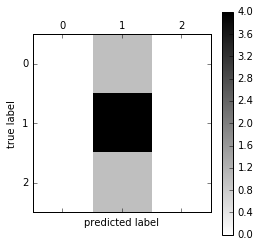

In [159]:
# Applying confusion matrix for logistic regression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
print("Confusion Matrix:\n%s" % confusion_matrix(Y_test, logreg.predict(X_test)))

_ = plt.matshow(confusion_matrix(Y_test, logreg.predict(X_test)), cmap=plt.cm.binary, interpolation='nearest')
_ = plt.colorbar()
_ = plt.ylabel('true label')
_ = plt.xlabel('predicted label')

# Verification of File Formats for Initial Load of data

### Verfying whether Fingertip Temperature File is in correct format

In [171]:
verify = !ls ./Documents/Semester2/Projects/Insomnia/newskintemp/INS_WI*/*[Ff][Ii][Nn][Gg][Ee][Rr]*.xlsx

for f in verify:
    file_df = pd.read_excel(f)
    filename = file_df['Unnamed: 1'][2]
    print(filename)

Fingertip_INS_WI_002_N1 
Fingertip_INS_WI_003_N1 
Fingertip_INS_WI_004_N1 
Fingertip_INS_WI_006_N1 
Fingertip_INS_WI_007_N1 
Fingertip_INS_WI_008_N1 
FINGERTIP_INS_WI_011_N1 
Fingertip_INS_WI_012_N1 
Fingertip_INS_WI_013_N1 
Fingertip_INS_WI_017_N1 
Fingertip_INS_WI_019_N1
Fingertip_INS_WI_020_N1 
Fingertip_INS_WI_021_N1 
Fingertip_INS_WI_022_N1 
Fingertip_INS_WI_025_N1 
Fingertip_INS_WI_026_N1 
Fingertip_INS_WI_030_N1 
Fingertip_INS_WI_032_N1 


### Verfying whether Abdomen Temperature File is in correct format

In [172]:
verify = !ls ./Documents/Semester2/Projects/Insomnia/newskintemp/INS_WI*/*[Aa][Bb][Dd][Oo][Mm][Ee][Nn]*.xlsx

for f in verify:
    file_df = pd.read_excel(f)
    filename = file_df['Unnamed: 1'][2]
    print(filename)

Abdomen_INS_WI_002_N1 
Abdomen_INS_WI_003_N1 
Abdomen_INS_WI_004_N1 
Abdomen_INS_WI_006_N1 
Abdomen_INS_WI_007_N1 
Abdomen_INS_WI_008_N1 
ABDOMEN_INS_WI_011_N1 
Abdomen_INS_WI_012_N1 
Abdomen_INS_WI_013_N1 
Abdomen_INS_WI_017_N1 
Abdomen_INS_WI_019_N1 
Abdomen_INS_WI_020_N1 
Abdomen_INS_WI_021_N1 
Abdomen_INS_WI_022_N1 
Abdomen_INS_WI_025_N1 
Abdomen_INS_WI_026_N1 
Abdomen_INS_WI_030_N1 
Abdomen_INS_WI_032_N1 


### Verfying whether Calf Temperature File is in correct format

In [173]:
verify = !ls ./Documents/Semester2/Projects/Insomnia/newskintemp/INS_WI*/*[Cc][Aa][Ll][Ff]*.xlsx

for f in verify:
    file_df = pd.read_excel(f)
    filename = file_df['Unnamed: 1'][2]
    print(filename)

Calf_INS_WI_002_N1 
Calf_INS_WI_003_N1 
Calf_INS_WI_004_N1 
Calf_INS_WI_006_N1 
Calf_INS_WI_007_N1 
Calf_INS_WI_008_N1 
CALF_INS_WI_011_N1 
Calf_INS_WI_012_N1 
Calf_INS_WI_013_N1 
Calf_INS_WI_017_N1 
Calf_INS_WI_019_N1 
Calf_INS_WI_020_N1 
Calf_INS_WI_021_N1 
Calf_INS_WI_022_N1 
Calf_INS_WI_025_N1 
Calf_INS_WI_026_N1 
Calf_INS_WI_030_N1 
Calf_INS_WI_032_N1 


### Verfying whether Chest Temperature File is in correct format

In [174]:
verify = !ls ./Documents/Semester2/Projects/Insomnia/newskintemp/INS_WI*/*[Cc][Hh][Ee][Ss][Tt]*.xlsx

for f in verify:
    file_df = pd.read_excel(f)
    filename = file_df['Unnamed: 1'][2]
    print(filename)

Chest_INS_WI_002_N1 
Chest_INS_WI_003_N1 
Chest_INS_WI_004_N1 
Chest_INS_WI_006_N1 
Chest_INS_WI_007_N1 
Chest_INS_WI_008_N1 
CHEST_INS_WI_011_N1 
Chest_INS_WI_012_N1 
Chest_INS_WI_013_N1 
Chest_INS_WI_017_N1 
Chest_INS_WI_019_N1 
Chest_INS_WI_020_N1 
Chest_INS_WI_021_N1 
Chest_INS_WI_022_N1 
Chest_INS_WI_025_N1 
Chest_INS_WI_026_N1 
Chest_INS_WI_030_N1 
Chest_INS_WI_032_N1 


### Verfying whether Foot Temperature File is in correct format

In [175]:
verify = !ls ./Documents/Semester2/Projects/Insomnia/newskintemp/INS_WI*/*[Ff][Oo][Oo][Tt]*.xlsx
#verify = !ls ./Documents/Semester2/Projects/Insomnia/newskintemp/INS_WI*/*[Ff][Oo][Oo][Tt]*_032_N1*.xlsx

for f in verify:
    file_df = pd.read_excel(f)
    filename = file_df['Unnamed: 1'][2]
    print(filename)

Foot_INS_WI_002_N1 
Foot_INS_WI_003_N1 
Foot_INS_WI_004_N1 
Foot_INS_WI_006_N1 
Foot_INS_WI_007_N1 
Foot_INS_WI_008_N1 
FOOT_INS_WI_011_N1 
Foot_INS_WI_012_N1 
Foot_INS_WI_013_N1 
Foot_INS_WI_017_N1 
Foot_INS_WI_019_N1
Foot_INS_WI_020_N1 
Foot_INS_WI_021_N1 
Foot_INS_WI_022_N1 
Foot_INS_WI_025_N1 
Foot_INS_WI_026_N1 
Foot_INS_WI_030_N1 
Foot_INS_WI_032_N1 


### Verfying whether Forearm Temperature File is in correct format

In [176]:
verify = !ls ./Documents/Semester2/Projects/Insomnia/newskintemp/INS_WI*/*[Ff][Oo][Rr][Ee][Aa][Rr][Mm]*.xlsx

for f in verify:
    file_df = pd.read_excel(f)
    filename = file_df['Unnamed: 1'][2]
    print(filename)

Forearm_INS_WI_002_N1 
Forearm_INS_WI_003_N1 
Forearm_INS_WI_004_N1 
Forearm_INS_WI_006_N1 
Forearm_INS_WI_007_N1 
Forearm_INS_WI_008_N1 
FOREARM_INS_WI_011_N1 
ForeArm_INS_WI_012_N1 
Forearm_INS_WI_013_N1 
Forearm_INS_WI_017_N1 
Forearm_INS_WI_019_N1 
Forearm_INS_WI_020_N1 
Forearm_INS_WI_021_N1 
Forearm_INS_WI_022_N1 
Forearm_INS_WI_025_N1 
Forearm_INS_WI_026_N1 
Forearm_INS_WI_030_N1 
Forearm_INS_WI_032_N1 


### Verfying whether Forehead Temperature File is in correct format

In [177]:
verify = !ls ./Documents/Semester2/Projects/Insomnia/newskintemp/INS_WI*/*[Ff][Oo][Rr][Ee][Hh][Ee][Aa][Dd]*.xlsx

for f in verify:
    file_df = pd.read_excel(f)
    filename = file_df['Unnamed: 1'][2]
    print(filename)

Forehead_INS_WI_002_N1 
Forehead_INS_WI_003_N1 
Forehead_INS_WI_004_N1 
Forehead_INS_WI_006_N1 
Forehead_INS_WI_007_N1 
Forehead_INS_WI_008_N1 
FOREHEAD_INS_WI_011_N1 
Forehead_INS_WI_012_N1 
Forehead_INS_WI_013_N1 
Forehead_INS_WI_017_N1 
Forehead_INS_WI_019_N1 
Forehead_INS_WI_020_N1 
Forehead_INS_WI_021_N1 
Forehead_INS_WI_022_N1 
Forehead_INS_WI_025_N1 
Forehead_INS_WI_026_N1 
Forehead_INS_WI_030_N1 
Forehead_INS_WI_032_N1 


### Verfying whether Hand Temperature File is in correct format

In [178]:
verify = !ls ./Documents/Semester2/Projects/Insomnia/newskintemp/INS_WI*/*[Hh][Aa][Nn][Dd]*.xlsx

for f in verify:
    file_df = pd.read_excel(f)
    filename = file_df['Unnamed: 1'][2]
    print(filename)

Hand_INS_WI_002_N1 
hand_INS_WI_003_N1 
Hand_INS_WI_004_N1 
Hand_INS_WI_006_N1 
Hand_INS_WI_007_N1 
Hand_INS_WI_008_N1 
HAND_INS_WI_011_N1 
Hand_INS_WI_012_N1 
Hand_INS_WI_013_N1 
Hand_INS_WI_017_N1 
Hand_INS_WI_019_N1 
Hand_INS_WI_021_N1 
Hand_INS_WI_022_N1 
Hand_INS_WI_025_N1 
Hand_INS_WI_026_N1 
Hand_INS_WI_030_N1 
Hand_INS_WI_032_N1 


### Verfying whether Scapula Temperature File is in correct format

In [179]:
verify = !ls ./Documents/Semester2/Projects/Insomnia/newskintemp/INS_WI*/*[Ss][Cc][Aa][Pp][Uu][Ll][Aa]*.xlsx

for f in verify:
    file_df = pd.read_excel(f)
    filename = file_df['Unnamed: 1'][2]
    print(filename)

Scapula_INS_WI_002_N1 
Scapula_INS_WI_003_N1 
Scapula_INS_WI_004_N1 
Scapula_INS_WI_006_N1 
Scapula_INS_WI_007_N1 
Scapula_INS_WI_008_N1 
SCAPULA_INS_WI_011_N1 
Scapula_INS_WI_012_N1 
Scapula_INS_WI_013_N1 
Scapula_INS_WI_017_N1 
Scapula_INS_WI_019_N1 
Scapula_INS_WI_020_N1 
Scapula_INS_WI_021_N1 
Scapula_INS_WI_022_N1 
Scapula_INS_WI_025_N1 
Scapula_INS_WI_026_N1 
Scapula_INS_WI_030_N1 
Scapula_INS_WI_032_N1 


### Verfying whether Toe Temperature File is in correct format

In [180]:
verify = !ls ./Documents/Semester2/Projects/Insomnia/newskintemp/INS_WI*/*[Tt][Oo][Ee]*.xlsx
#verify = !ls ./Documents/Semester2/Projects/Insomnia/newskintemp/INS_WI*/*[Tt][Oo][Ee]*_006_N1*.xlsx



for f in verify:
    file_df = pd.read_excel(f)
    filename = file_df['Unnamed: 1'][2]
    print(filename)

Toe_INS_WI_002_N1 
Toe_INS_WI_003_N1 
Toe_INS_WI_004_N1 
Toe_INS_WI_006_N1 
Toe_INS_WI_007_N1 
Toe_INS_WI_008_N1 
TOE_INS_WI_011_N1 
Toe_INS_WI_012_N1 
Toe_INS_WI_017_N1 
Toe_INS_WI_019_N1 
Toe_INS_WI_020_N1 
Toe_INS_WI_021_N1 
Toe_INS_WI_022_N1 
Toe_INS_WI_025_N1 
Toe_INS_WI_026_N1 
Toe_INS_WI_030_N1 
Toe_INS_WI_032_N1 


### Verfying whether Upperarm Temperature File is in correct format

In [182]:
verify = !ls ./Documents/Semester2/Projects/Insomnia/newskintemp/INS_WI*/*[Uu][Pp][Pp][Ee][Rr][Aa][Rr][Mm]*.xlsx

for f in verify:
    file_df = pd.read_excel(f)
    filename = file_df['Unnamed: 1'][2]
    print(filename)

UpperArm_INS_WI_002_N1 
UpperArm_INS_WI_003_N1 
UpperArm_INS_WI_004_N1 
Upperarm_INS_WI_006_N1 
Upperarm_INS_WI_007_N1 
UpperArm_INS_WI_008_N1 
UPPERARM_INS_WI_011_N1 
UpperArm_INS_WI_012_N1 
UpperArm_INS_WI_013_N1 
Upperarm_INS_WI_017_N1 
Upperarm_INS_WI_019_N1 
Upperarm_INS_WI_020_N1 
Upperarm_INS_WI_021_N1 
Upperarm_INS_WI_022_N1 
Upperarm_INS_WI_025_N1 
Upperarm_INS_WI_026_N1 
Upperarm_INS_WI_030_N1 
Upperarm_INS_WI_032_N1 


### Verfying whether UpperLeg Temperature File is in correct format

In [183]:
verify = !ls ./Documents/Semester2/Projects/Insomnia/newskintemp/INS_WI*/*[Uu][Pp][Pp][Ee][Rr][Ll][]Ee][Gg]*.xlsx

for f in verify:
    file_df = pd.read_excel(f)
    filename = file_df['Unnamed: 1'][2]
    print(filename)

UpperLeg_INS_WI_003_N1 
Upperleg_INS_WI_004_N1 
Upperleg_INS_WI_006_N1 
Upperleg_INS_WI_007_N1 
UpperLeg_INS_WI_008_N1 
UPPERLEG_INS_WI_011_N1 
Upperleg_INS_WI_012_N1 
UpperLeg_INS_WI_013_N1 
Upperleg_INS_WI_017_N1 
Upperleg_INS_WI_019_N1 
Upperleg_INS_WI_020_N1 
Upperleg_INS_WI_021_N1 
Upperleg_INS_WI_022_N1 
Upperleg_INS_WI_025_N1 
Upperleg_INS_WI_026_N1 
Upperleg_INS_WI_030_N1 
Upperleg_INS_WI_032_N1 
